In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RS = 20040304

In [2]:
df_train = pd.read_csv("data/fashion-mnist_train.csv")
df_test = pd.read_csv("data/fashion-mnist_test.csv")

In [3]:
def normalize(df, exclude_col):
    df_n = df.drop(columns=exclude_col)
    df_n = df_n / 255.
    df_n[exclude_col] = df[exclude_col]
    return df_n

df_train = normalize(df_train, 'label')
df_test = normalize(df_test, 'label')

df_all = pd.concat([df_train, df_test], ignore_index=True)
df_all.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3


In [34]:
df_train_px = df_train.drop(columns='label')
df_test_px = df_test.drop(columns='label')
df_all_px = df_all.drop(columns='label')

df_all_px.head()


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


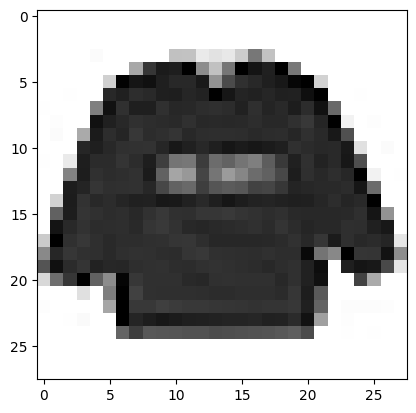

In [48]:
def plot_image(df, index, x = 28, y = 28):
    img = df.iloc[index, :].to_numpy().reshape(x, y)
    plt.imshow(img, cmap='gray_r', vmin=0, vmax=1)

plot_image(df_all_px, 0)

## Dimensionality reduction

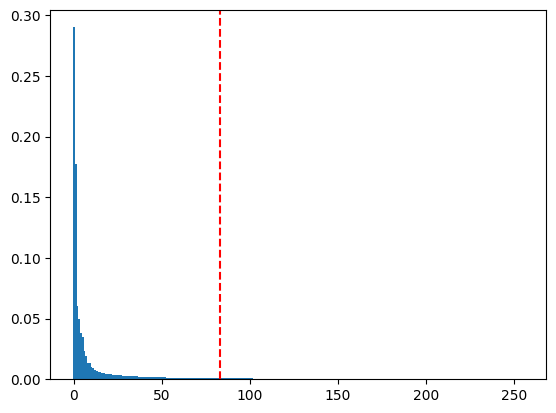

In [71]:
from sklearn.decomposition import PCA

pca = PCA(random_state=RS)
pca.fit(df_all_px)
scree_data = pca.explained_variance_ratio_

# 90% of the variance should remain
thresh = 0.9

sum = 0
idx = 0
for idx, el in enumerate(scree_data):
    sum += el
    if sum > thresh:
        break

scree_len = 256
plt.axvline(x=idx, color='red', linestyle='--', linewidth=1.5, label='x = 84')
# plt.yscale('log')
plt.bar(range(scree_len), scree_data[:scree_len], width=1)
plt.show()

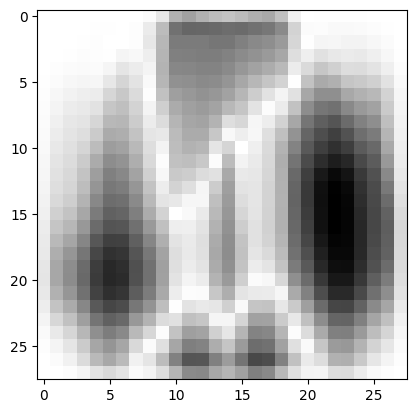

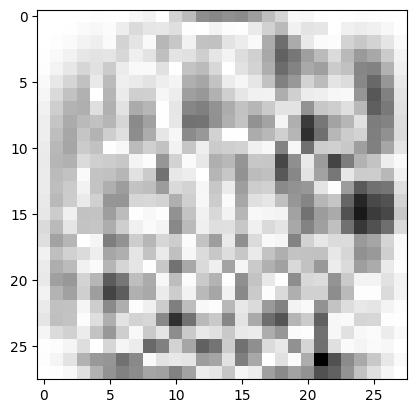

In [67]:
def plot_component(component_idx):
    def component_normalize(arr):
        return arr / np.max(arr)

    plot_image(pd.DataFrame(component_normalize(np.abs(pca.components_[component_idx])).reshape(1, -1)), 0)
    plt.show()

plot_component(1)
plot_component(32)

In [ ]:
n_components = idx + 1
pca = PCA(n_components=n_components)
reduced_pca = pca.fit_transform(df_all_px)

In [ ]:
from umap import UMAP

umap = UMAP(n_components=2, random_state=RS, n_neighbors=5)
reduced_umap = umap.fit_transform(reduced_pca)

/home/frun/agh/sem5/fods/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


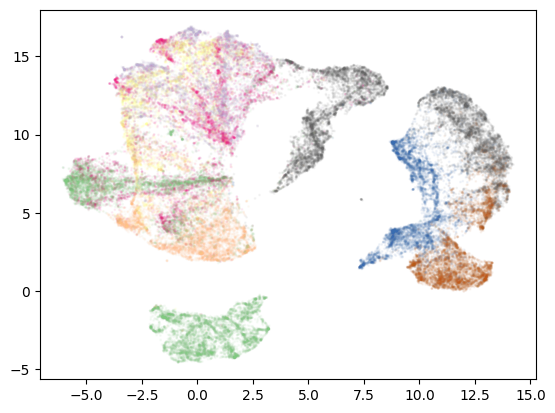

In [109]:
plt.scatter(reduced_umap[:, 0], reduced_umap[:, 1], c=df_all['label'], cmap='Accent', s=1, alpha=0.05)
plt.show()

In [ ]:
from sklearn.manifold import TSNE

mask = np.random.choice([True, False], size=len(reduced_pca), p=[0.1, 0.9])

tsne = TSNE(n_components=2, random_state=RS)
reduced_tsne = tsne.fit_transform(reduced_pca[mask])

plt.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], c=df_all['label'][mask], cmap='Accent')

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import rand_score

kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_umap)

rand_score(df_all['label'], kmeans.labels_)

np.float64(0.8987137118285363)

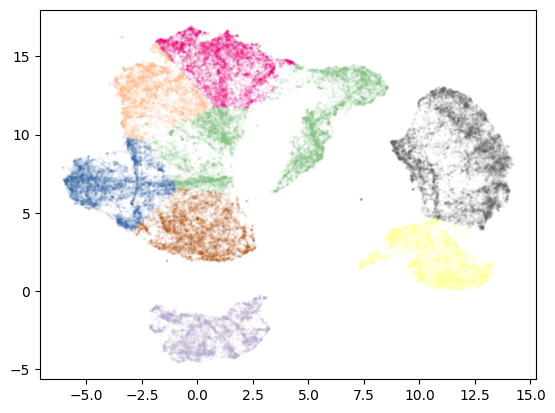

In [108]:
plt.scatter(reduced_umap[:, 0], reduced_umap[:, 1], c=kmeans.labels_, cmap='Accent', s=1, alpha=0.05)
plt.show()

In [84]:
kmeans.labels_

array([1, 9, 3, ..., 8, 1, 3], dtype=int32)

In [10]:

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')

# ax.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], reduced_tsne[:, 2], c=df_all['label'][:2000], cmap='Accent')
# ax.view_init(elev=45, azim=50)

# plt.show()

# # Parameters for the grid
# rows, cols = 3, 3  # Create a 3x3 grid of plots
# elevations = [-30, 0, 30]  # Different elevations for rows
# azimuths = [-60, 0, 60]    # Different azimuths for columns

# fig, axes = plt.subplots(rows, cols, subplot_kw={'projection': '3d'}, figsize=(15, 15))

# # Loop through the grid and plot
# for i in range(rows):
#     for j in range(cols):
#         ax = axes[i, j]
#         elev = elevations[i]
#         azim = azimuths[j]
        
#         # Scatter plot
#         sc = ax.scatter(reduced_tsne[:, 0], reduced_tsne[:, 1], reduced_tsne[:, 2], 
#                         c=df_all['label'][:2000], cmap='Accent', s=10)
        
#         # Set different rotations
#         ax.view_init(elev=elev, azim=azim)
#         ax.set_title(f"Elev: {elev}, Azim: {azim}")

# # Adjust layout
# plt.tight_layout()
# plt.show()